<a href="https://colab.research.google.com/github/trDalmi/Data-Science-Portfolio/blob/main/Finding_lanes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1 : Convert Image to grayscale.

In [18]:
import cv2

In [19]:
image = cv2.imread("/content/test_image.jpg")

In [20]:
from google.colab.patches import cv2_imshow # Import the cv2_imshow function from google.colab.patches

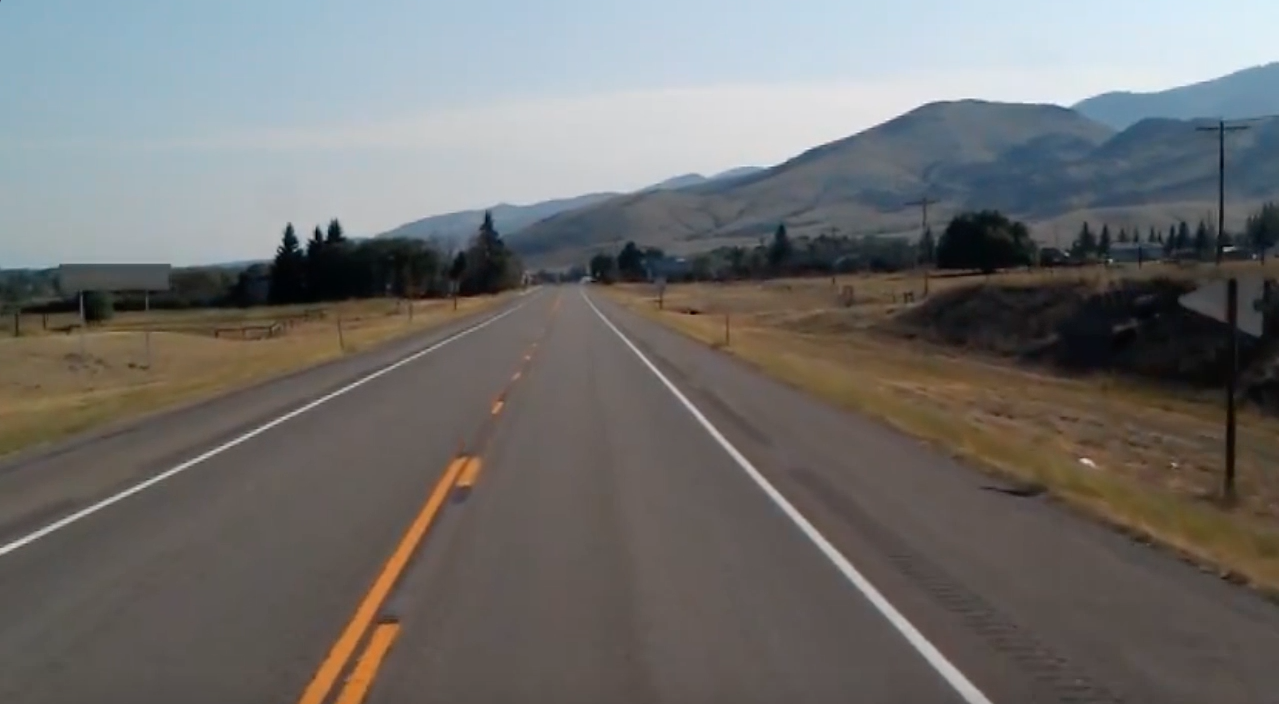

-1

In [21]:
cv2_imshow(image)
cv2.waitKey(0)

In [22]:
import numpy as np

Always make a copy of the array as if u make any changes that should not be reflected into the intial real image.


In [23]:
lane_image = np.copy(image)

In [65]:
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

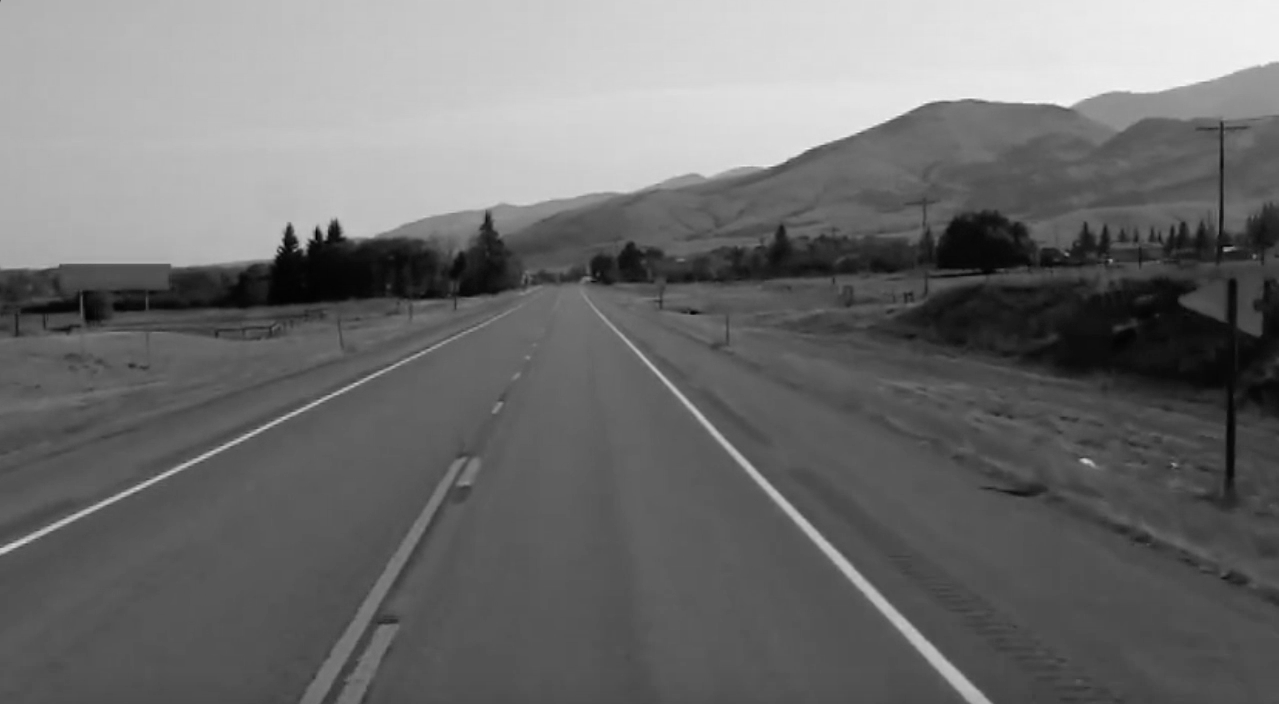

In [27]:
cv2_imshow(gray)

## Step 2: Reduce Noise and smoothen our image.

 Image noice can coz false edge and ultimately affect the edge detection.


 The filtering and smoothening will be done here by gaussian filter.

 In this approach the value of a pixel will be the average value of the pixels around it. This will be performed by a kernel having normally distributed gaussian vlaues that we will run through the image to obtain the blur image.

 blur = cv2.GaussianBlur(gray,(5,5),0)


In [28]:
blur = cv2.GaussianBlur(gray,(5,5),0)

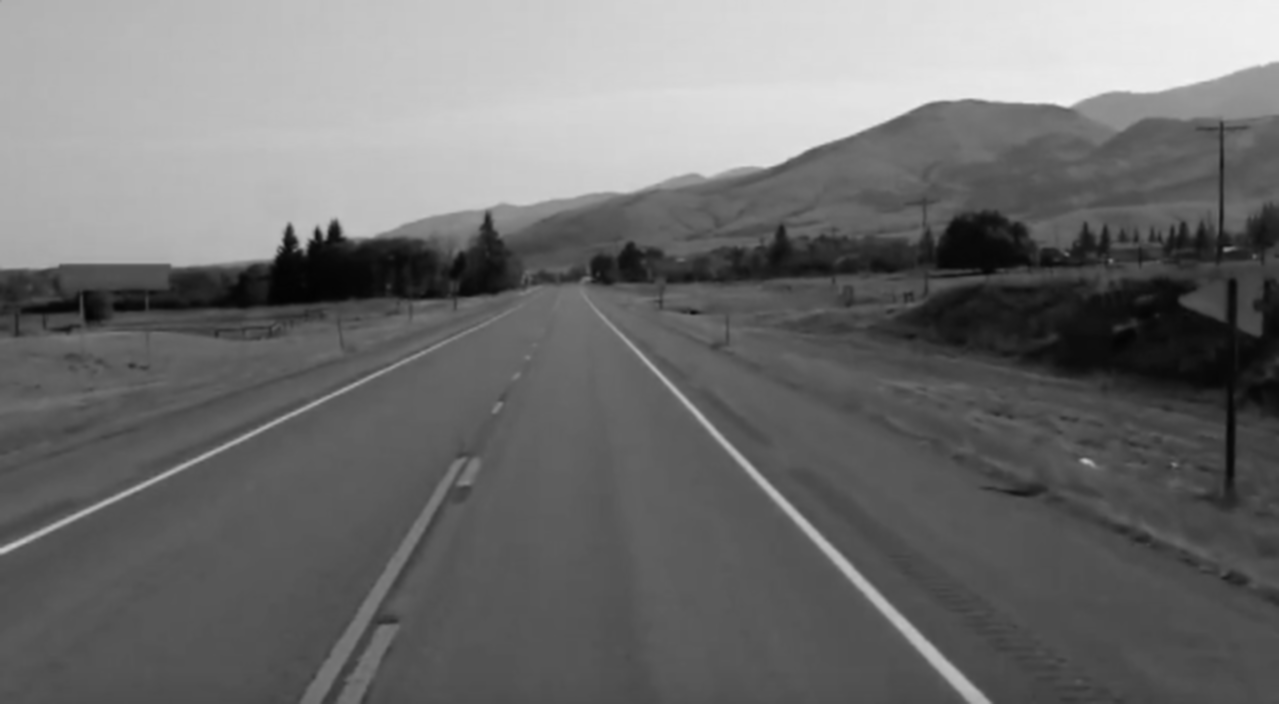

In [29]:
cv2_imshow(blur)

## Step 3: Detect the edges on the images.

### **Edge detection** is a fundamental technique in computer vision used to identify sharp intensity changes (edges) in images, which often correspond to object boundaries, textures, or scene structures.

The change in broghtness over the image is know as gradient. Strong gradient means steep change, and small gradient means shallow change.

Canny function will use derivative to find the change in intensity and graident ove the pixels.

cv2.Canny(image,low_threshold,high_threshold)

This will provide us with the strongest gradient on the image.


In [31]:
canny = cv2.Canny (blur,50,150)

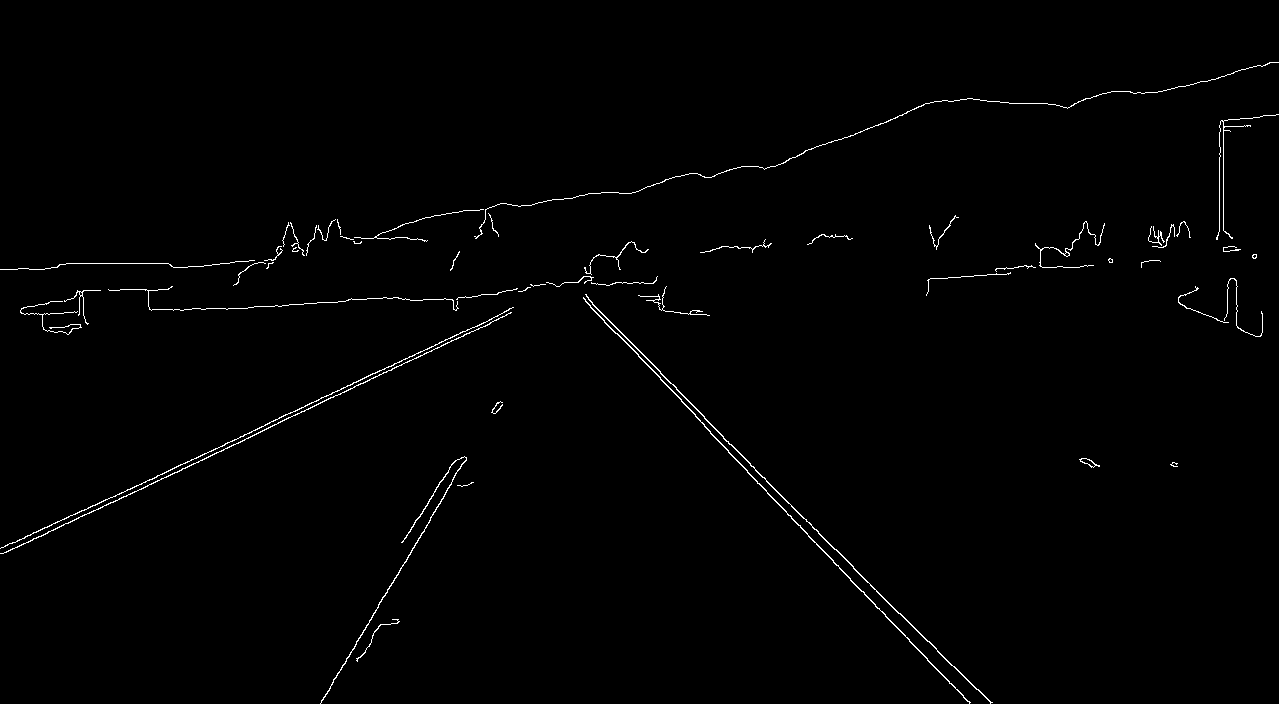

In [33]:
cv2_imshow(canny)

In [77]:
## Confining the above code in a function:
def canny(image):
  gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gray,(5,5),0)
  canny_image = cv2.Canny (blur,50,150)
  return canny_image

In [78]:
canny_image = canny(lane_image)

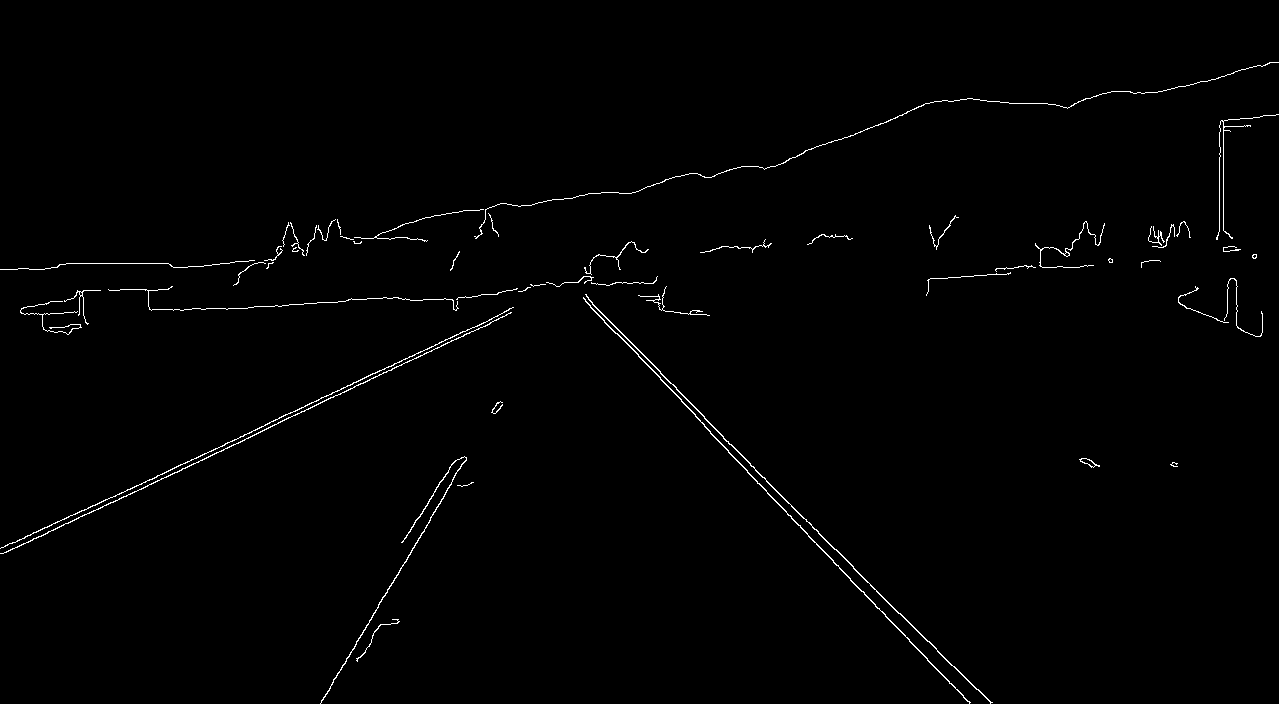

In [79]:
cv2_imshow(canny_image)

## Step 4: Finding Lanes: Region of Interest

In [68]:
def region_of_interest(image):
  height = image.shape[0]
  polygons = np.array([[(200,height),(1100,height),(550,250)]])
  mask = np.zeros_like(image)
  cv2.fillPoly(mask,polygons,255)
  masked_image = cv2.bitwise_and(image,mask)
  return masked_image
#

In [69]:
cropped_image = region_of_interest(canny)

## Step 5: Finding Lane Line: Using Hough Transformation 1

For a line y = mx + c,
  in hough space with coordinate system of m,b we can represent the above line as a single point having coordinates as (m,b)

And a single point can have many different lines passing through it, in hough space a single point is a line.(family of line gives m,b in such a way that makes a line in hough space)

If we have two point in simple coordiante system, then the slope and intercept of the line passing throuhg both the point is the intersection of the hough space line for the corresponding coordinates.



This idea of finding the possible lines from seriers of point, is how we will find the line in our gradient image, which is series of white points that represent the edge in our image space.

As the points detected may not be on single line, so the hough lines may have many intersection points, then how to find the value of m,b??

For this we divide the hough space in grids and the grid have the max intersection is considered for the values of m,b. This would be the best fit line of our data.

Now, here again we have to consider the prob with the vertical lines in the cartesian coordinate system, having slope = infinty.
To tacke this we can represent the lines in rogh/ theta , i.e. polar coordinates. And for this representation we will get a sinosudal curve in the hough space representation.


In [70]:
lines = cv2.HoughLinesP(cropped_image,2 , np.pi/180, 100 , np.array( []),minLineLength = 40 , maxLineGap = 5)

In [71]:
def display_lines(image, lines):
  line_image = np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1,y1,x2,y2 = line.reshape(4)
      cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
  return line_image


In [72]:
lines_images = display_lines(lane_image,lines)

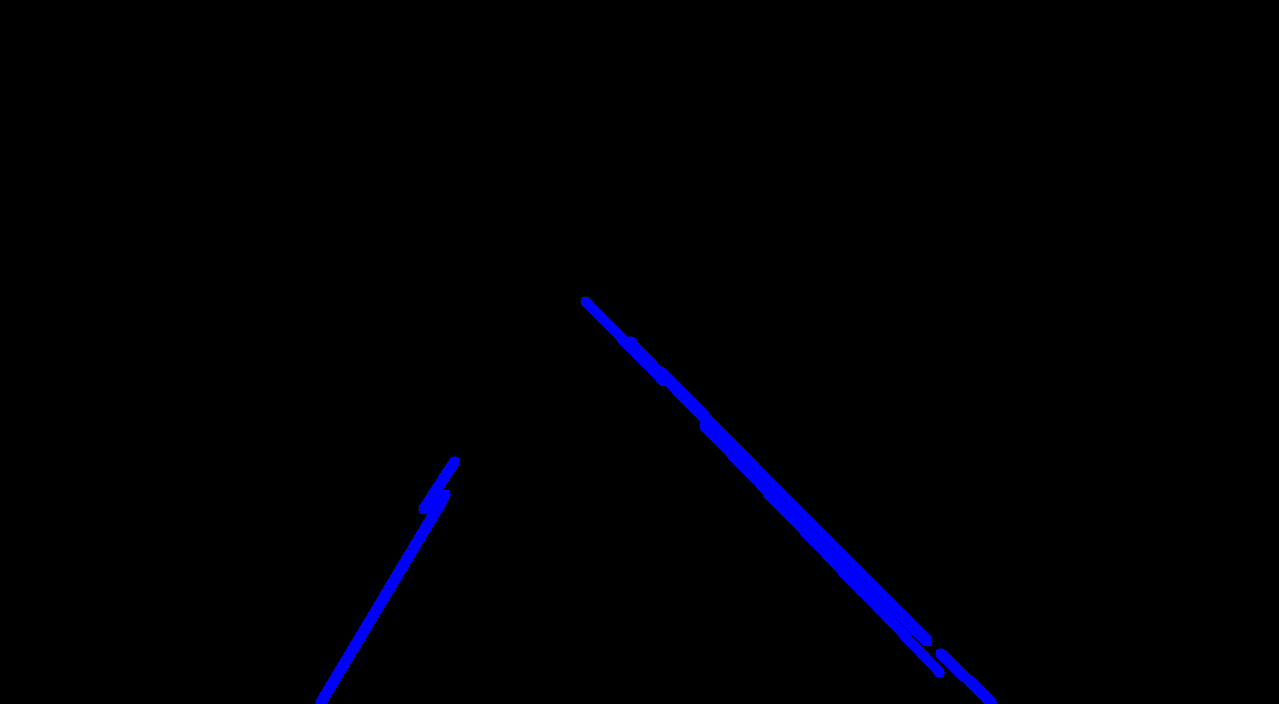

In [73]:
cv2_imshow(lines_images)

In [74]:
final_detect_image = cv2.addWeighted(lane_image,0.8,lines_images,1,1)

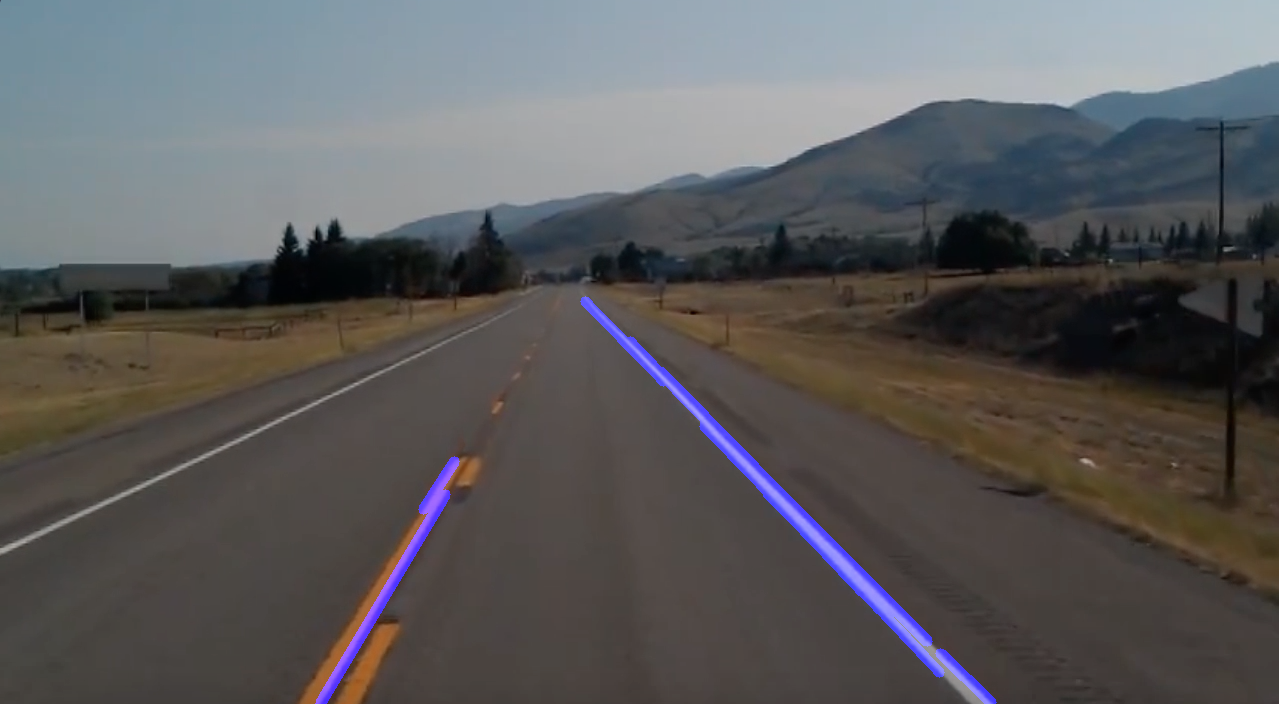

In [75]:
cv2_imshow(final_detect_image)